# AI Personality Drift Simulation - Longitudinal Trends Analysis
 
This notebook analyzes longitudinal trends in simulation data, including:
- Assessment score trajectories over time
- Personality trait drift patterns
- Mechanistic analysis trends
- Change point detection
- Growth rate analysis
- Trajectory similarity analysis
 
**Author**: Mike Keeman  
**Date**: July 2025  
**Version**: 1.0

In [1]:
import sys
import os
sys.path.append('../../src')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import json
from datetime import datetime

# Analysis imports
from analysis.statistical_analyzer import StatisticalAnalyzer
from analysis.visualization_toolkit import VisualizationToolkit
from analysis.longitudinal_analyzer import LongitudinalAnalyzer
from analysis.data_export import DataExporter

# Model imports
from models import Persona, AssessmentResult, PHQ9Result, GAD7Result, PSS10Result
from models.persona import PersonalityTrait

In [2]:
# Setup plotting style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

# Initialize analysis tools
stats_analyzer = StatisticalAnalyzer()
viz_toolkit = VisualizationToolkit(style="publication")
longitudinal_analyzer = LongitudinalAnalyzer()
data_exporter = DataExporter()

# %%
# Create output directory
output_dir = Path("../../data/results/longitudinal_analysis")
output_dir.mkdir(parents=True, exist_ok=True)

## Load Simulation Data

In [3]:
# Load assessment data (sample data if files not found)
assessment_data_path = Path("../../data/simulation/assessment_results.csv")
if assessment_data_path.exists():
    assessment_data = pd.read_csv(assessment_data_path)
    print(f"Loaded {len(assessment_data)} assessment records")
else:
    # Create sample data for demonstration
    print("Assessment data not found, creating sample data...")
    np.random.seed(42)
    
    # Generate sample assessment data
    personas = ['persona_1', 'persona_2', 'persona_3']
    assessment_types = ['phq9', 'gad7', 'pss10']
    days = range(0, 30, 7)  # Weekly assessments
    
    assessment_data = []
    for persona in personas:
        for assessment_type in assessment_types:
            baseline_score = np.random.uniform(5, 15)
            for day in days:
                # Add some drift over time
                drift = np.random.normal(0, 0.5) * (day / 30)
                score = max(0, baseline_score + drift)
                
                assessment_data.append({
                    'assessment_id': f"{persona}_{assessment_type}_{day}",
                    'persona_id': persona,
                    'assessment_type': assessment_type,
                    'simulation_day': day,
                    'total_score': score,
                    'severity_level': 'mild' if score < 10 else 'moderate',
                    'response_consistency': np.random.uniform(0.7, 0.95),
                    'response_time_avg': np.random.uniform(2.0, 5.0),
                    'created_at': datetime.now().isoformat()
                })
    
    assessment_data = pd.DataFrame(assessment_data)
    print(f"Created sample data with {len(assessment_data)} records")

print("Assessment data summary:")
print(assessment_data.describe())

Assessment data not found, creating sample data...
Created sample data with 45 records
Assessment data summary:
       simulation_day  total_score  response_consistency  response_time_avg
count       45.000000    45.000000             45.000000          45.000000
mean        14.000000     9.646447              0.819445           3.196479
std         10.011357     2.767043              0.070280           0.872437
min          0.000000     4.872979              0.706355           2.020856
25%          7.000000     8.453395              0.760514           2.483664
50%         14.000000     8.928383              0.822363           2.935133
75%         21.000000    10.107473              0.878311           3.803345
max         28.000000    14.891386              0.940612           4.960661


In [4]:
# Load mechanistic data (sample data if files not found)
mechanistic_data_path = Path("../../data/simulation/mechanistic_analysis.csv")
if mechanistic_data_path.exists():
    mechanistic_data = pd.read_csv(mechanistic_data_path)
    print(f"Loaded {len(mechanistic_data)} mechanistic records")
else:
    # Create sample mechanistic data
    print("Mechanistic data not found, creating sample data...")
    
    mechanistic_data = []
    layers = range(1, 13)  # 12 transformer layers
    
    for persona in personas:
        for day in days:
            for layer in layers:
                # Generate attention weights and activation values
                attention_weight = np.random.uniform(0.1, 0.9)
                activation_value = np.random.uniform(-1.0, 1.0)
                drift_magnitude = np.random.uniform(0.0, 0.2)
                
                mechanistic_data.append({
                    'persona_id': persona,
                    'simulation_day': day,
                    'layer': layer,
                    'analysis_type': 'attention',
                    'attention_weight': attention_weight,
                    'activation_value': activation_value,
                    'drift_magnitude': drift_magnitude,
                    'created_at': datetime.now().isoformat()
                })
    
    mechanistic_data = pd.DataFrame(mechanistic_data)
    print(f"Created sample mechanistic data with {len(mechanistic_data)} records")

print("Mechanistic data summary:")
print(mechanistic_data.describe())

Mechanistic data not found, creating sample data...
Created sample mechanistic data with 180 records
Mechanistic data summary:
       simulation_day       layer  attention_weight  activation_value  \
count      180.000000  180.000000        180.000000        180.000000   
mean        14.000000    6.500000          0.480815          0.040494   
std          9.927109    3.461682          0.234681          0.592648   
min          0.000000    1.000000          0.108670         -0.977293   
25%          7.000000    3.750000          0.275056         -0.505999   
50%         14.000000    6.500000          0.483479          0.073203   
75%         21.000000    9.250000          0.661996          0.579546   
max         28.000000   12.000000          0.889821          0.999435   

       drift_magnitude  
count       180.000000  
mean          0.099404  
std           0.058770  
min           0.001012  
25%           0.045985  
50%           0.104675  
75%           0.145198  
max           0

## Assessment Score Trajectories

In [6]:
# Analyze assessment trajectories for each type
assessment_types = ['phq9', 'gad7', 'pss10']

for assessment_type in assessment_types:
    print(f"\n=== {assessment_type.upper()} Trajectory Analysis ===")
    
    # Analyze trajectories
    trajectory_results = longitudinal_analyzer.analyze_assessment_trajectories(
        assessment_data, assessment_type
    )
    
    # Print summary for each persona
    for persona_id, trajectory in trajectory_results.items():
        if isinstance(trajectory, dict) and 'error' not in trajectory:
            print(f"\nPersona: {persona_id}")
            print(f"  Baseline Score: {trajectory['baseline_score']:.2f}")
            print(f"  Final Score: {trajectory['final_score']:.2f}")
            print(f"  Score Change: {trajectory['score_change']:.2f}")
            print(f"  Change Percentage: {trajectory['score_change_percentage']:.1f}%")
            print(f"  Assessment Count: {trajectory['assessment_count']}")
            
            # Trend analysis
            trend = trajectory['trend_analysis']
            print(f"  Trend Direction: {trend['direction']}")
            print(f"  Trend Significance: {trend['significant']}")
            print(f"  R-squared: {trend['r_squared']:.3f}")


=== PHQ9 Trajectory Analysis ===

Persona: persona_1
  Baseline Score: 8.75
  Final Score: 9.13
  Score Change: 0.38
  Change Percentage: 4.4%
  Assessment Count: 5
  Trend Direction: increasing
  Trend Significance: False
  R-squared: 0.149

Persona: persona_2
  Baseline Score: 8.57
  Final Score: 9.00
  Score Change: 0.43
  Change Percentage: 5.1%
  Assessment Count: 5
  Trend Direction: increasing
  Trend Significance: False
  R-squared: 0.652

Persona: persona_3
  Baseline Score: 14.30
  Final Score: 14.89
  Score Change: 0.59
  Change Percentage: 4.2%
  Assessment Count: 5
  Trend Direction: increasing
  Trend Significance: False
  R-squared: 0.539

=== GAD7 Trajectory Analysis ===

Persona: persona_1
  Baseline Score: 8.66
  Final Score: 8.53
  Score Change: -0.14
  Change Percentage: -1.6%
  Assessment Count: 5
  Trend Direction: decreasing
  Trend Significance: False
  R-squared: 0.289

Persona: persona_2
  Baseline Score: 13.63
  Final Score: 14.33
  Score Change: 0.70
  Chan

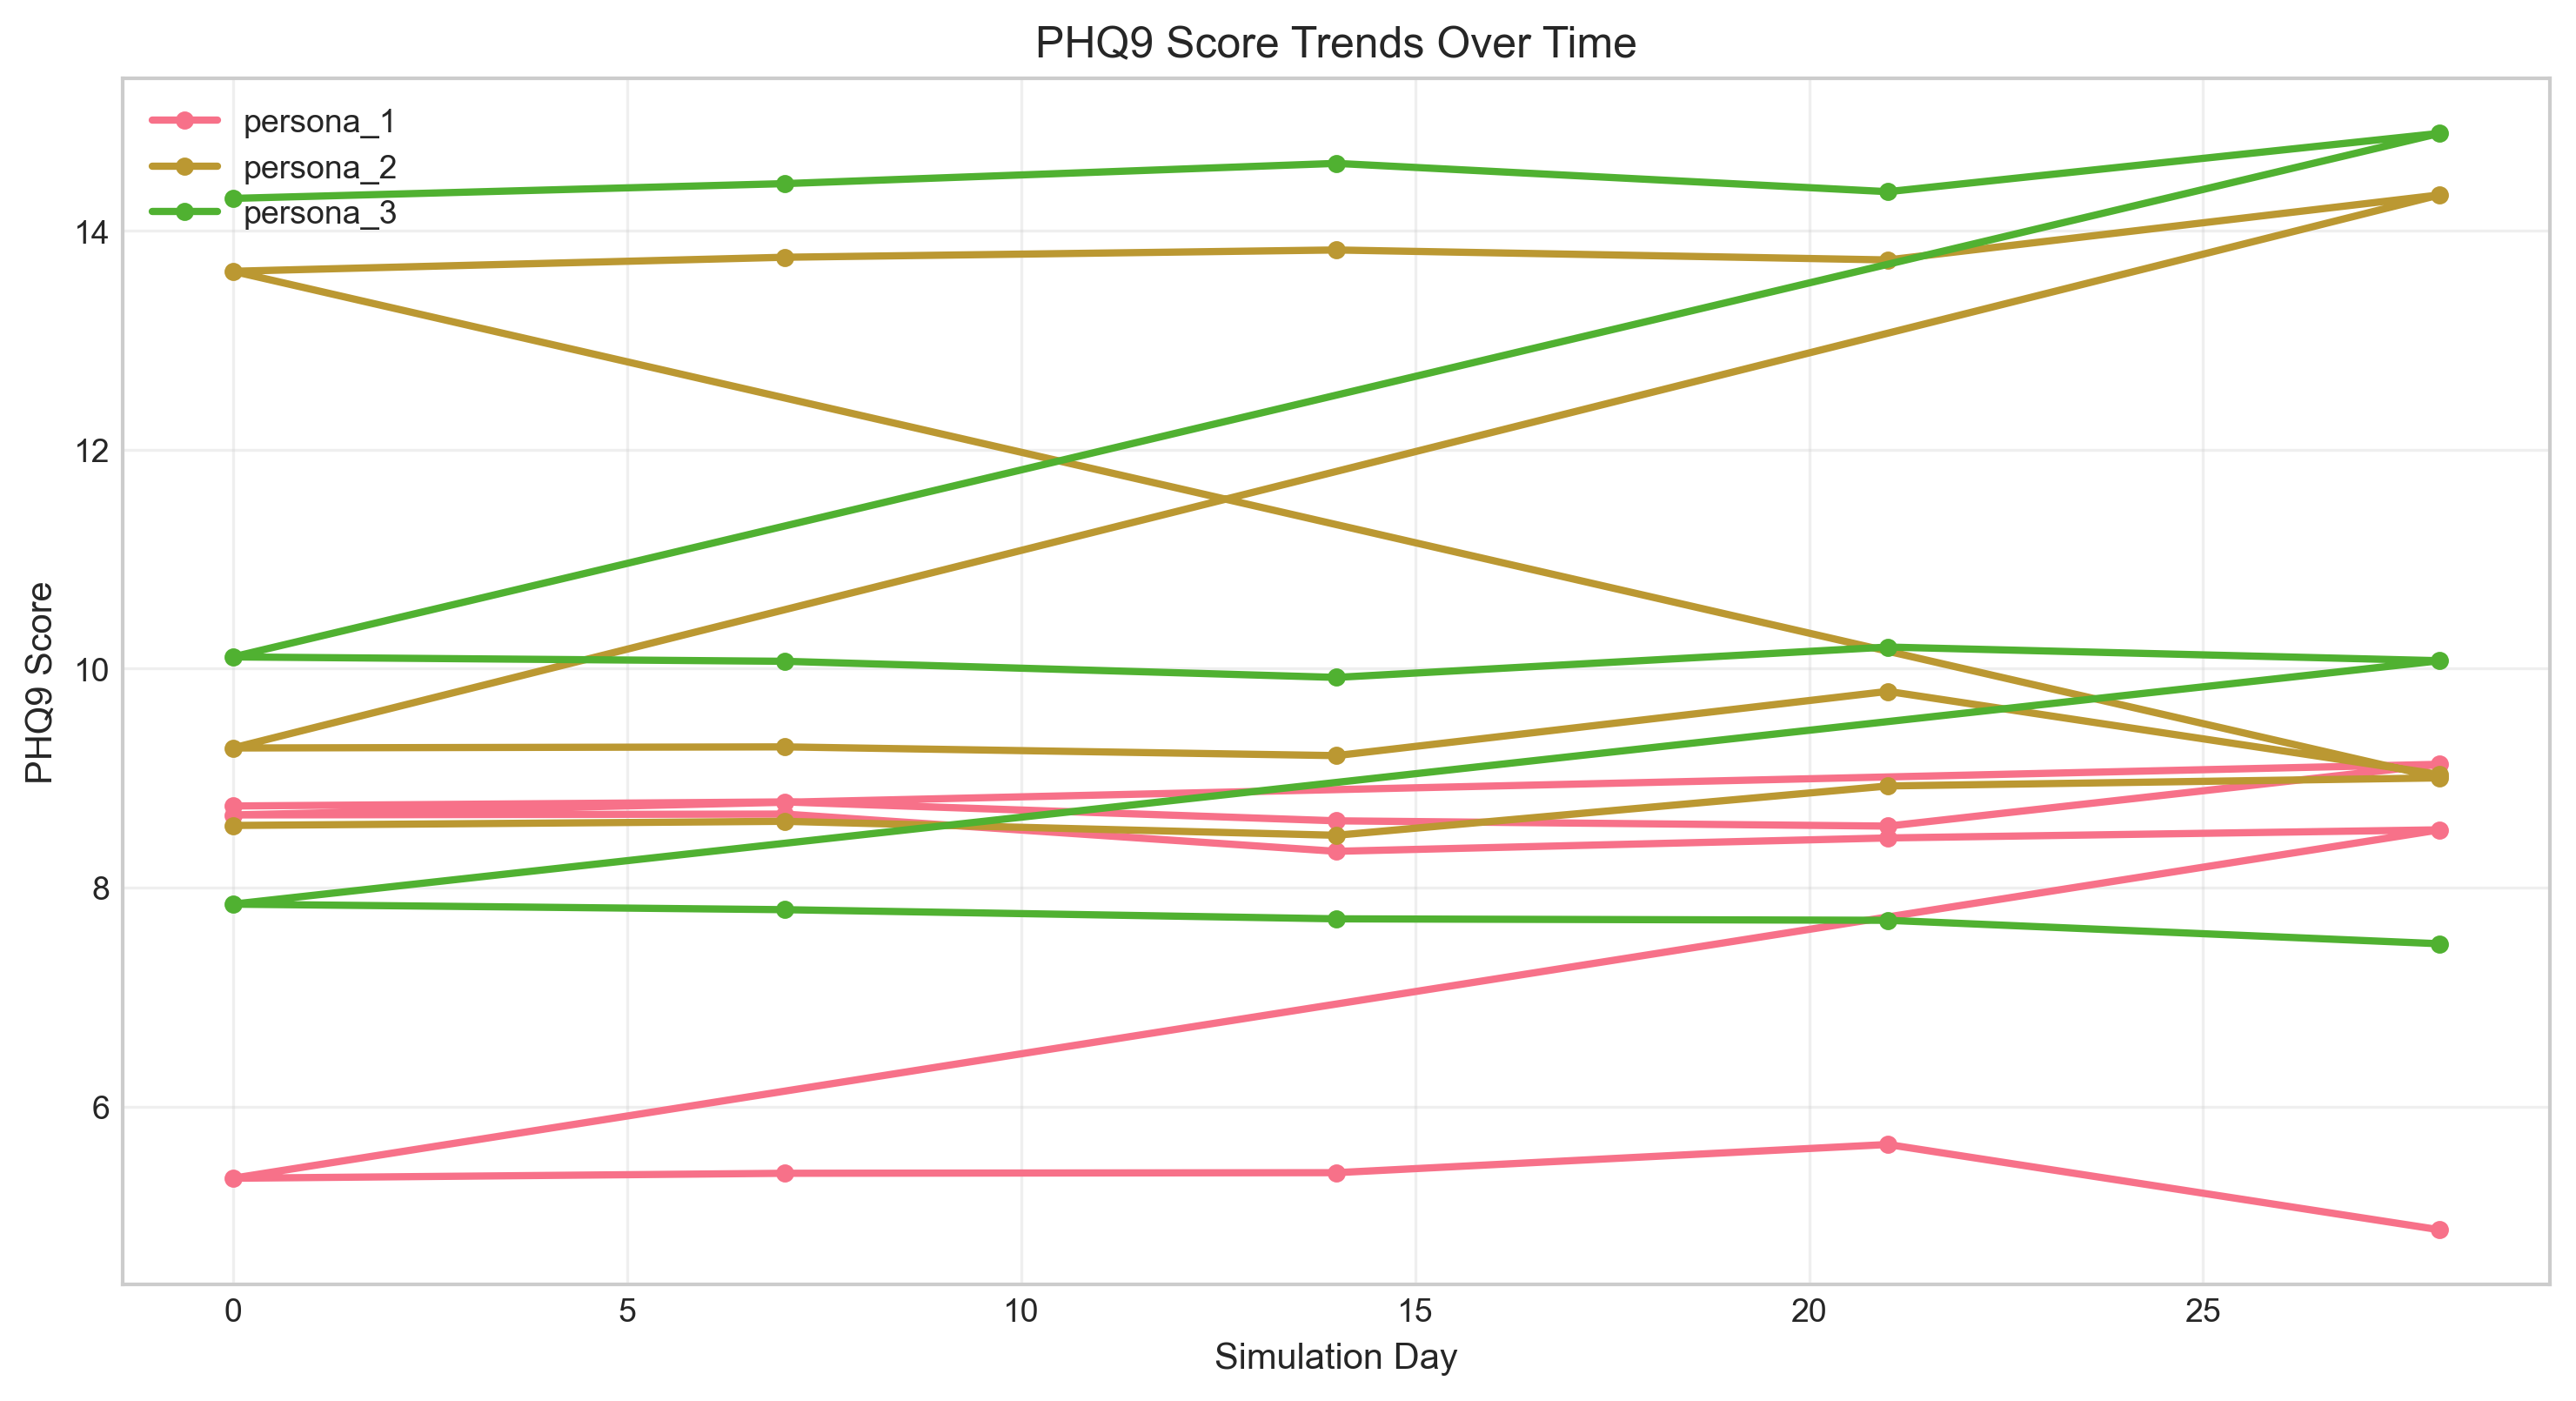

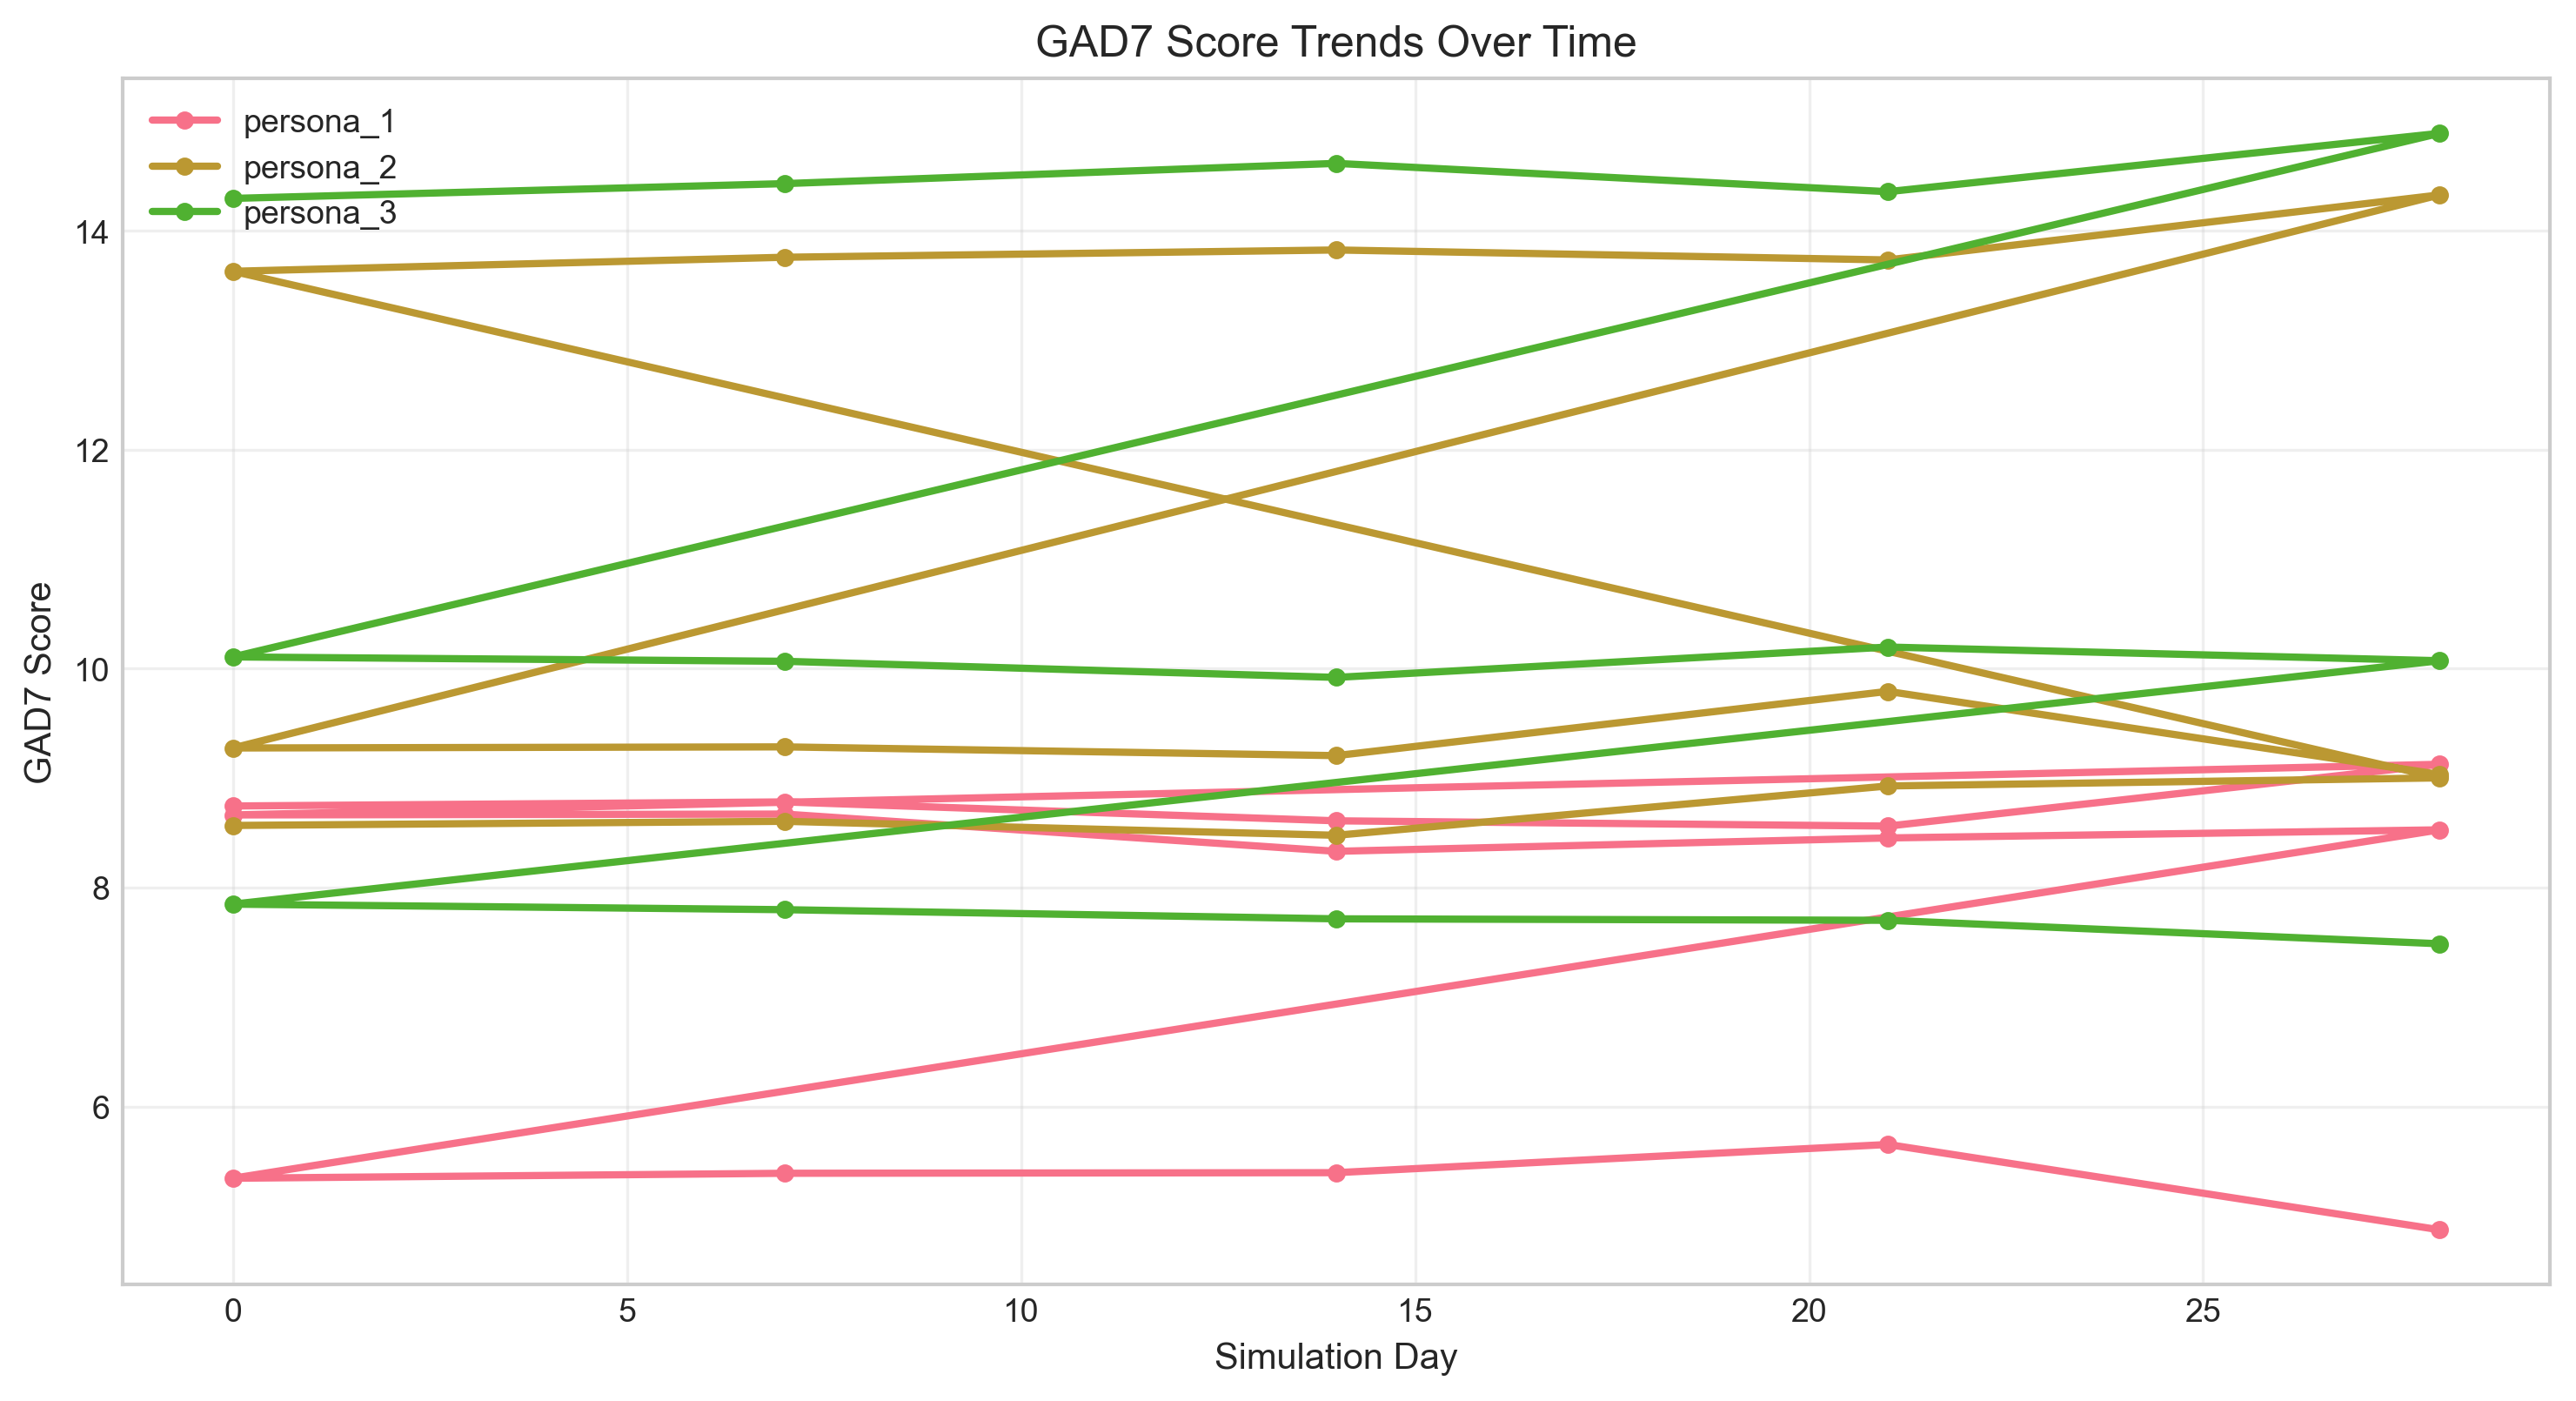

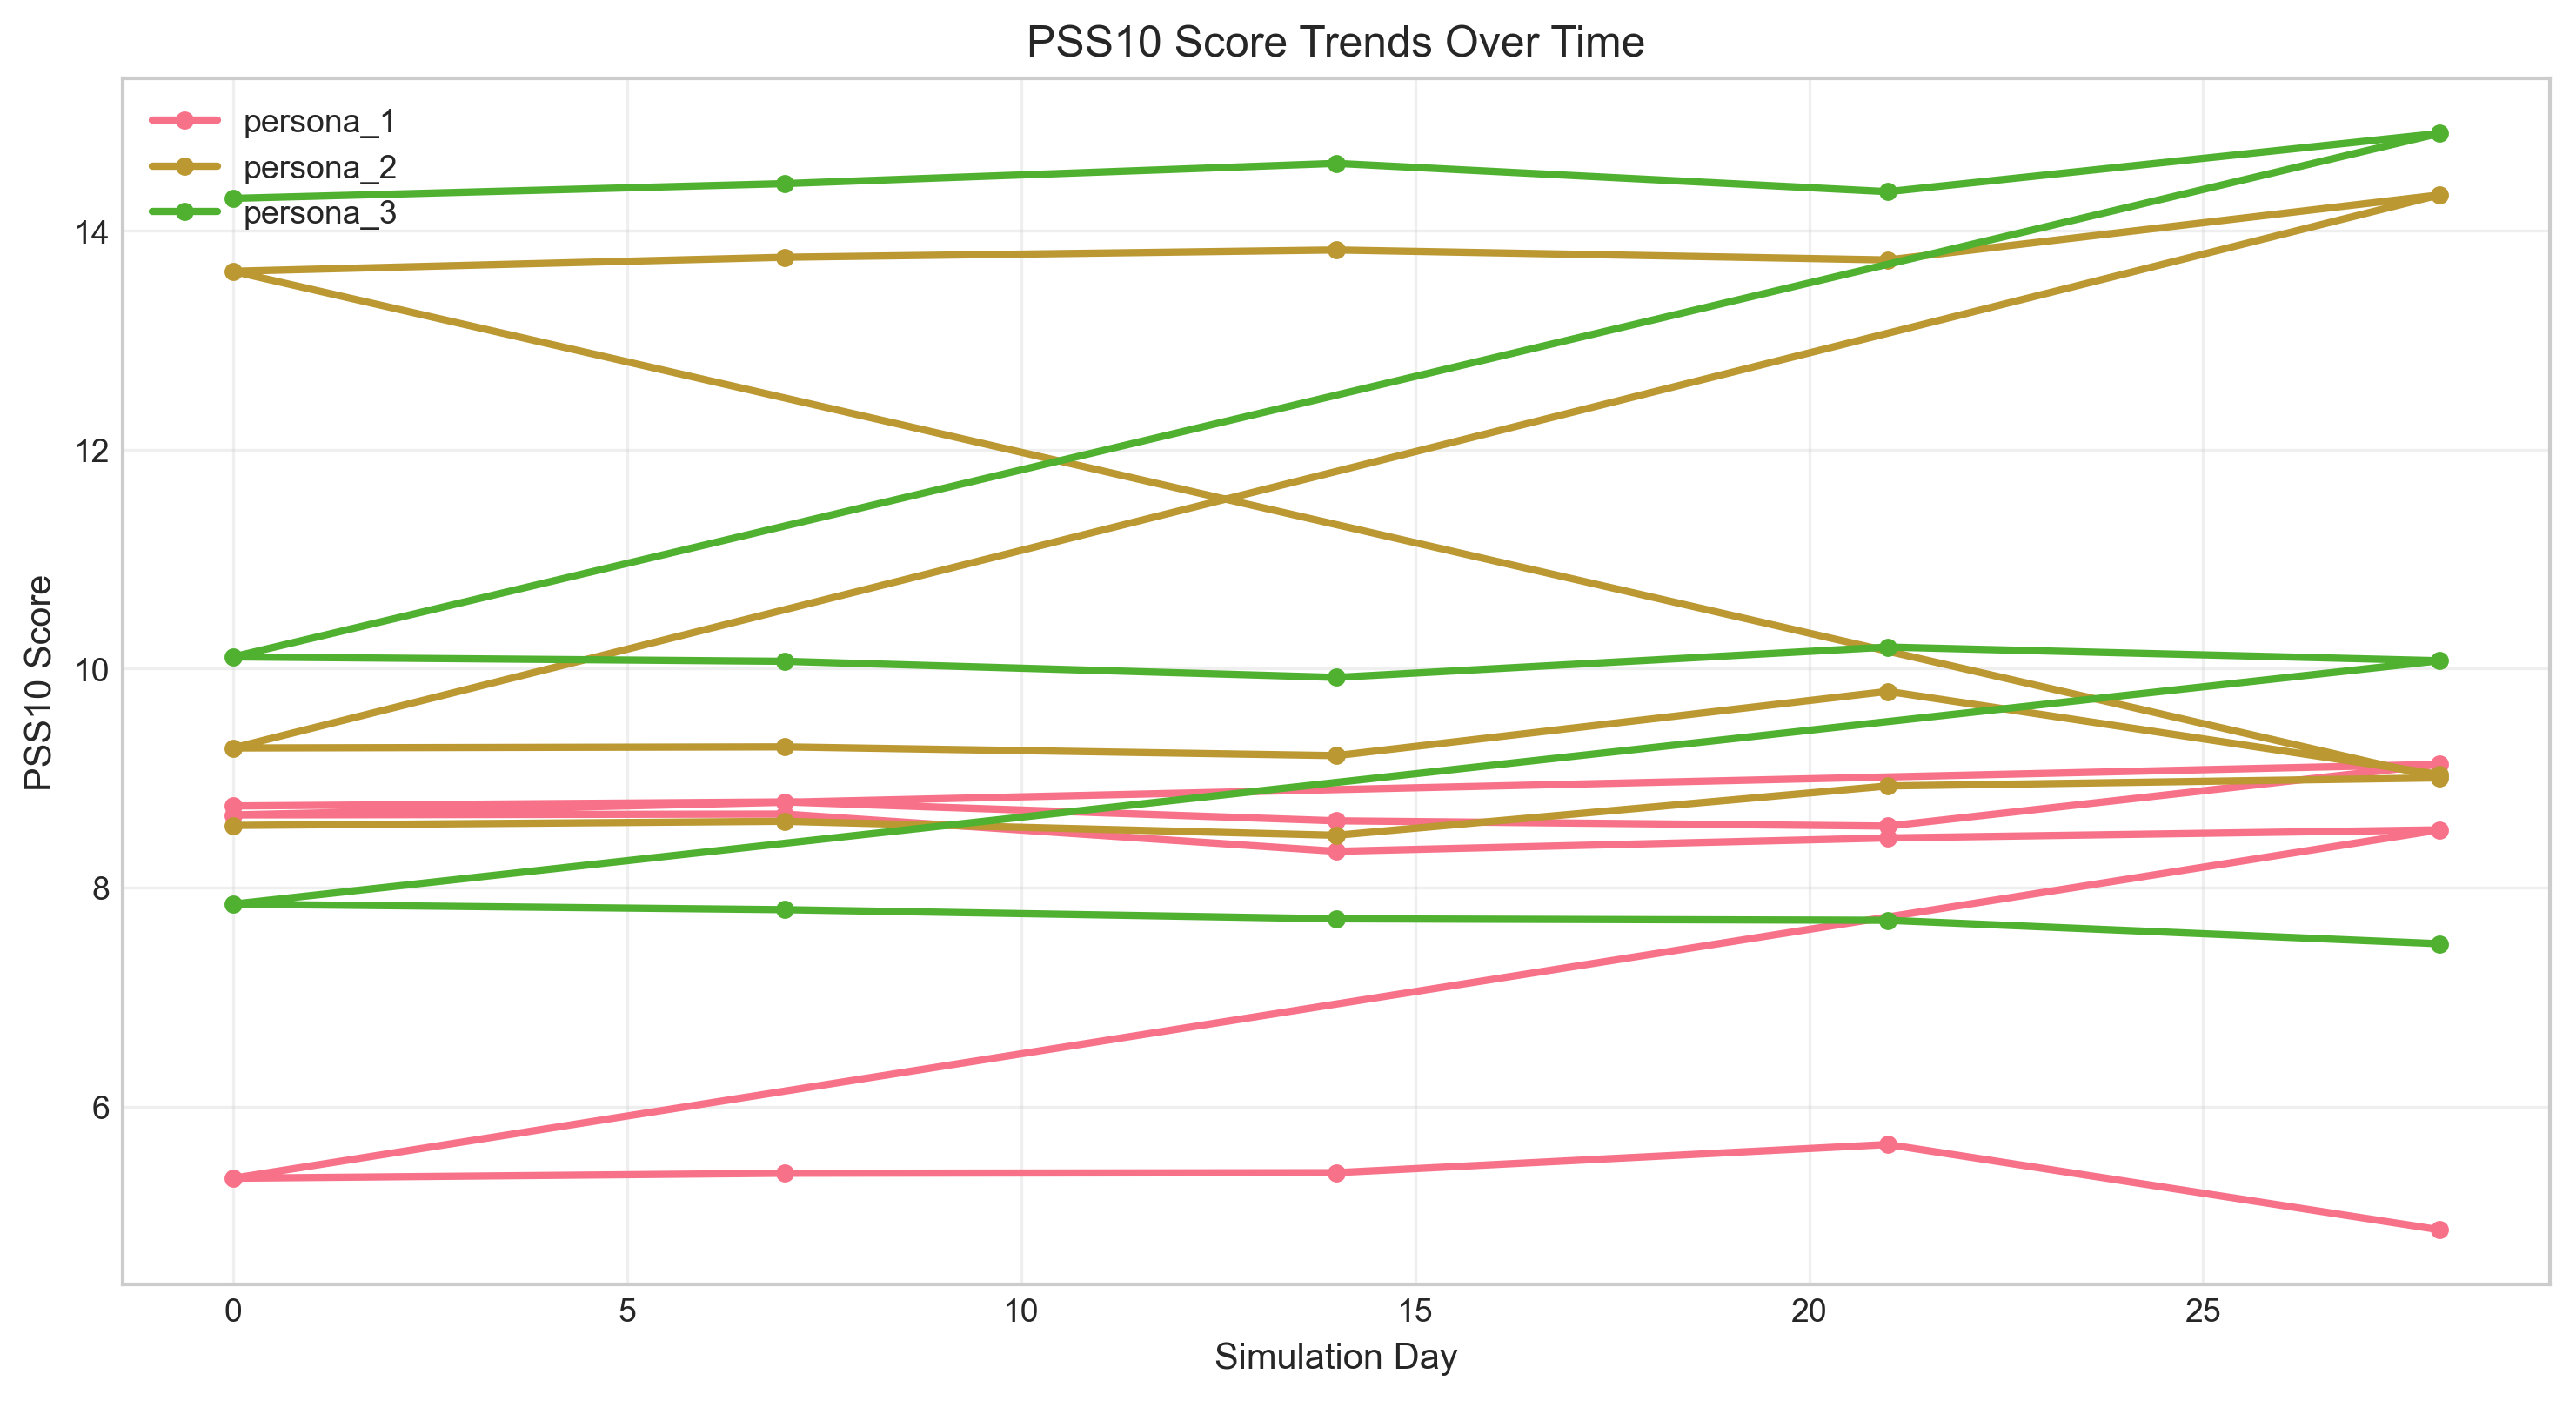

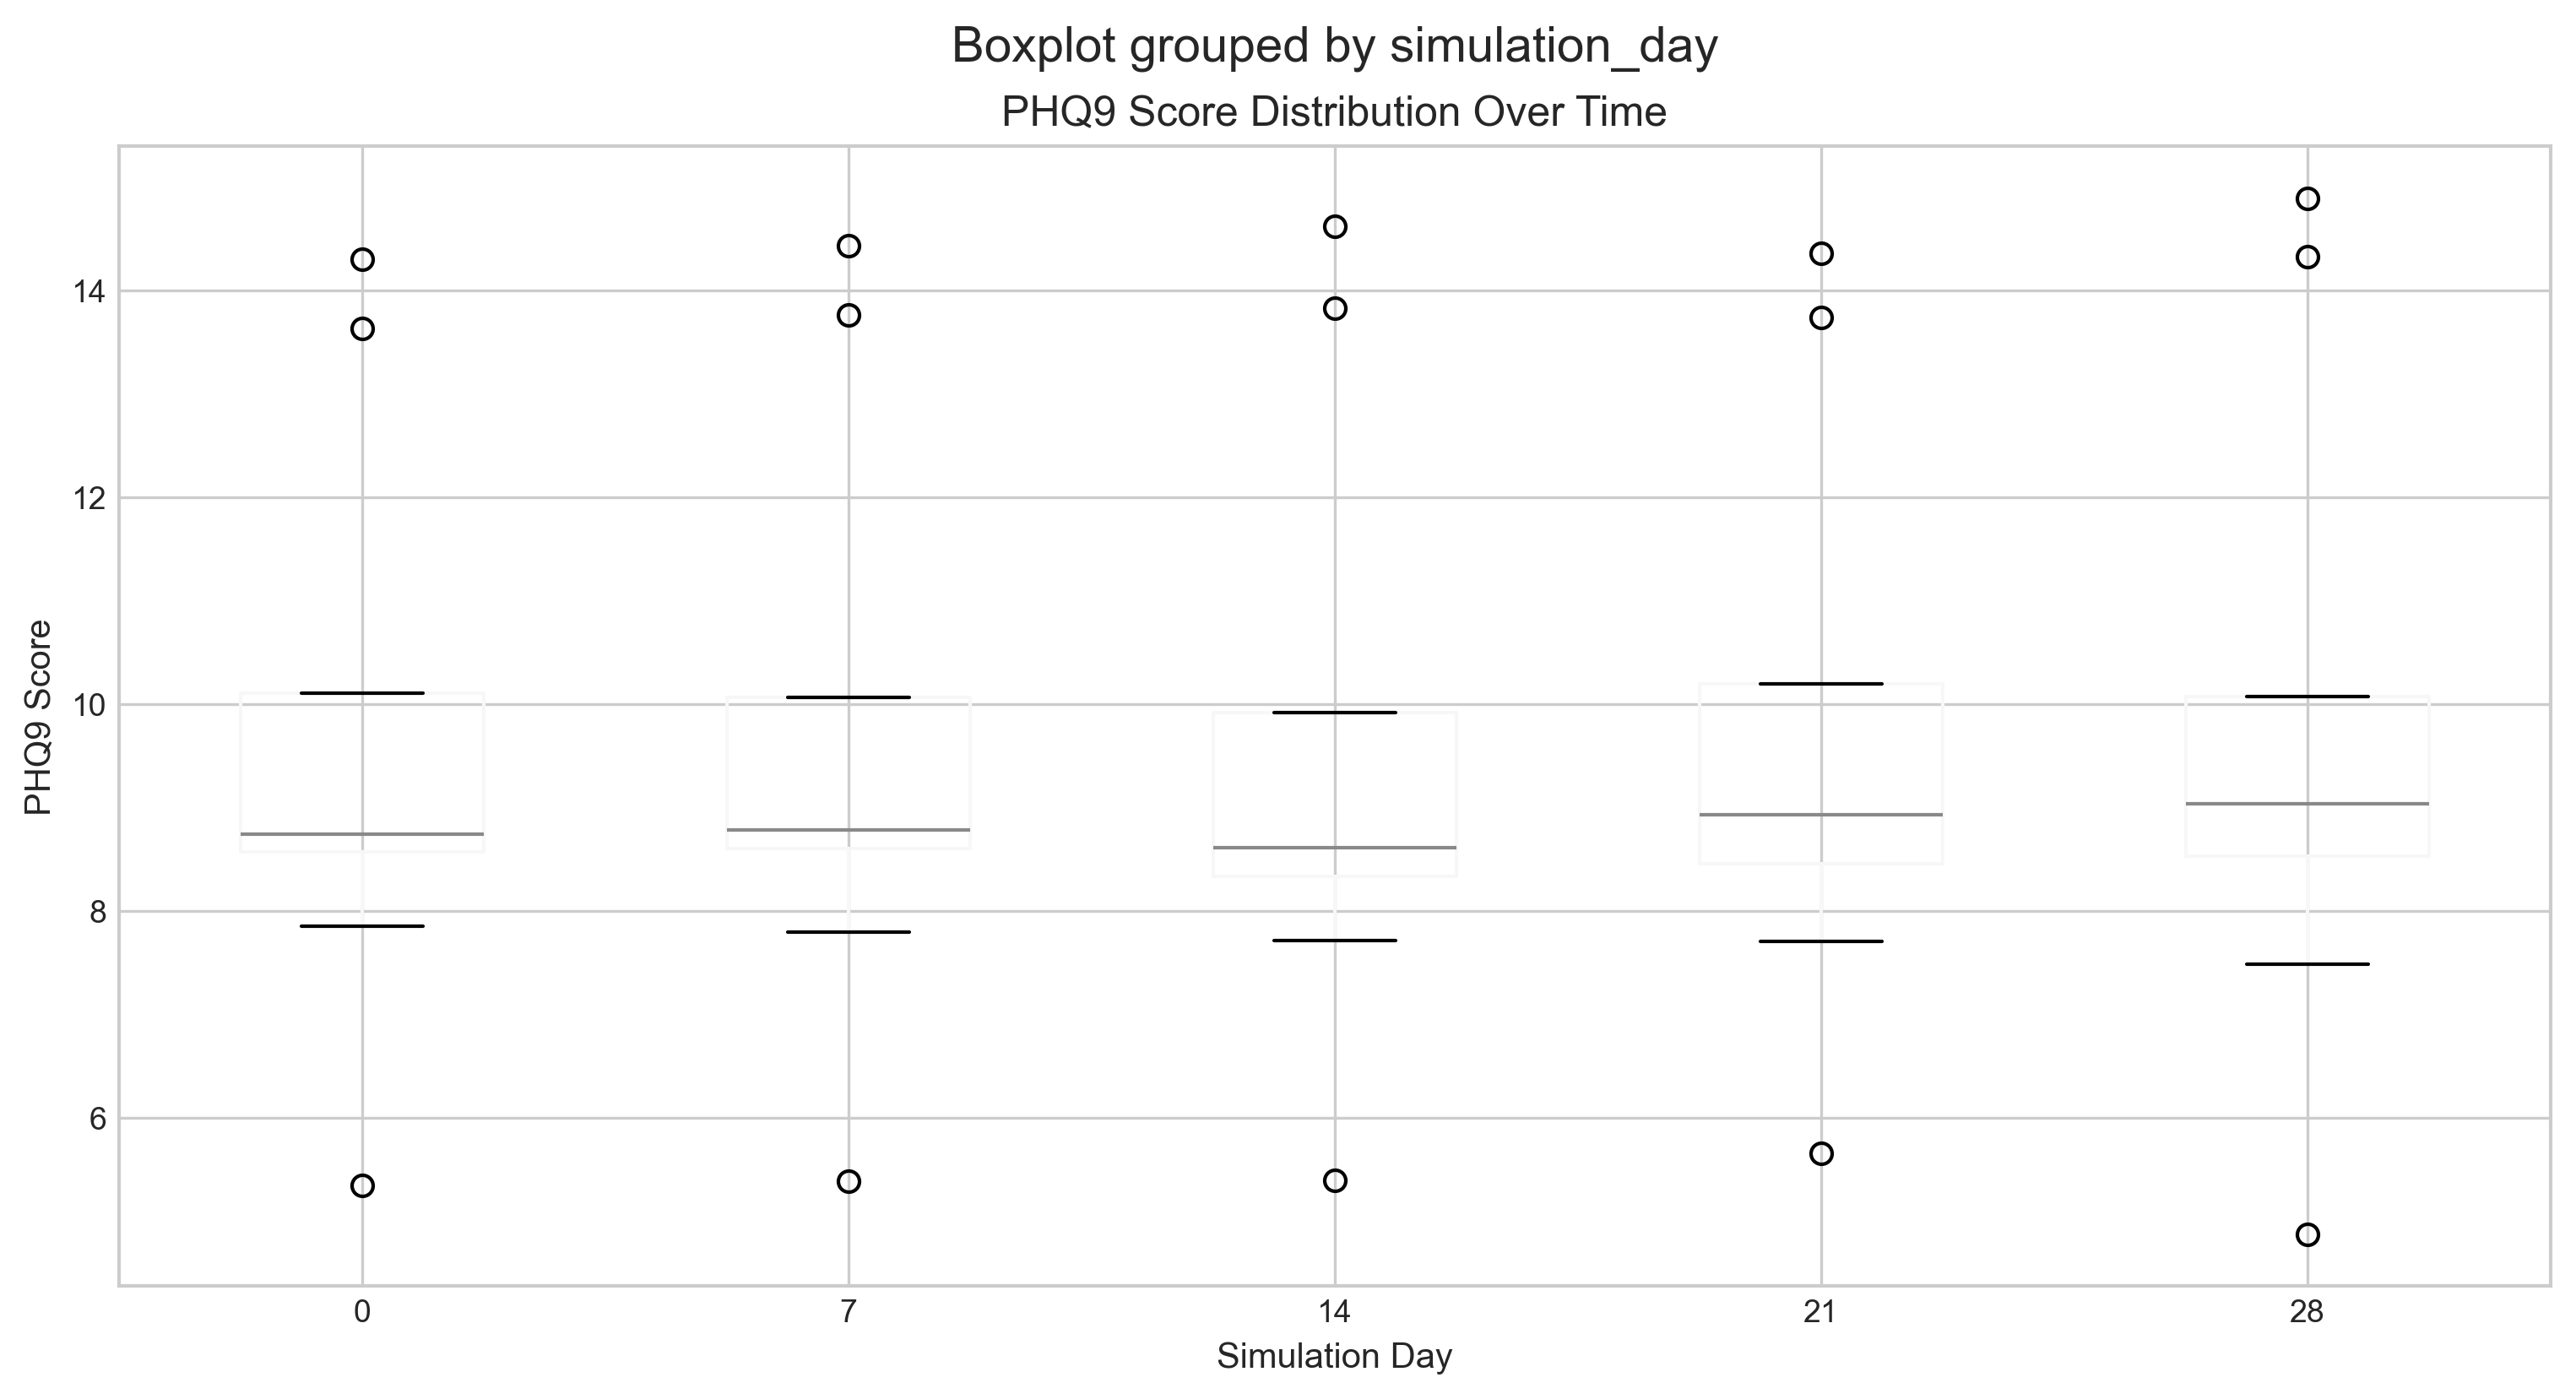

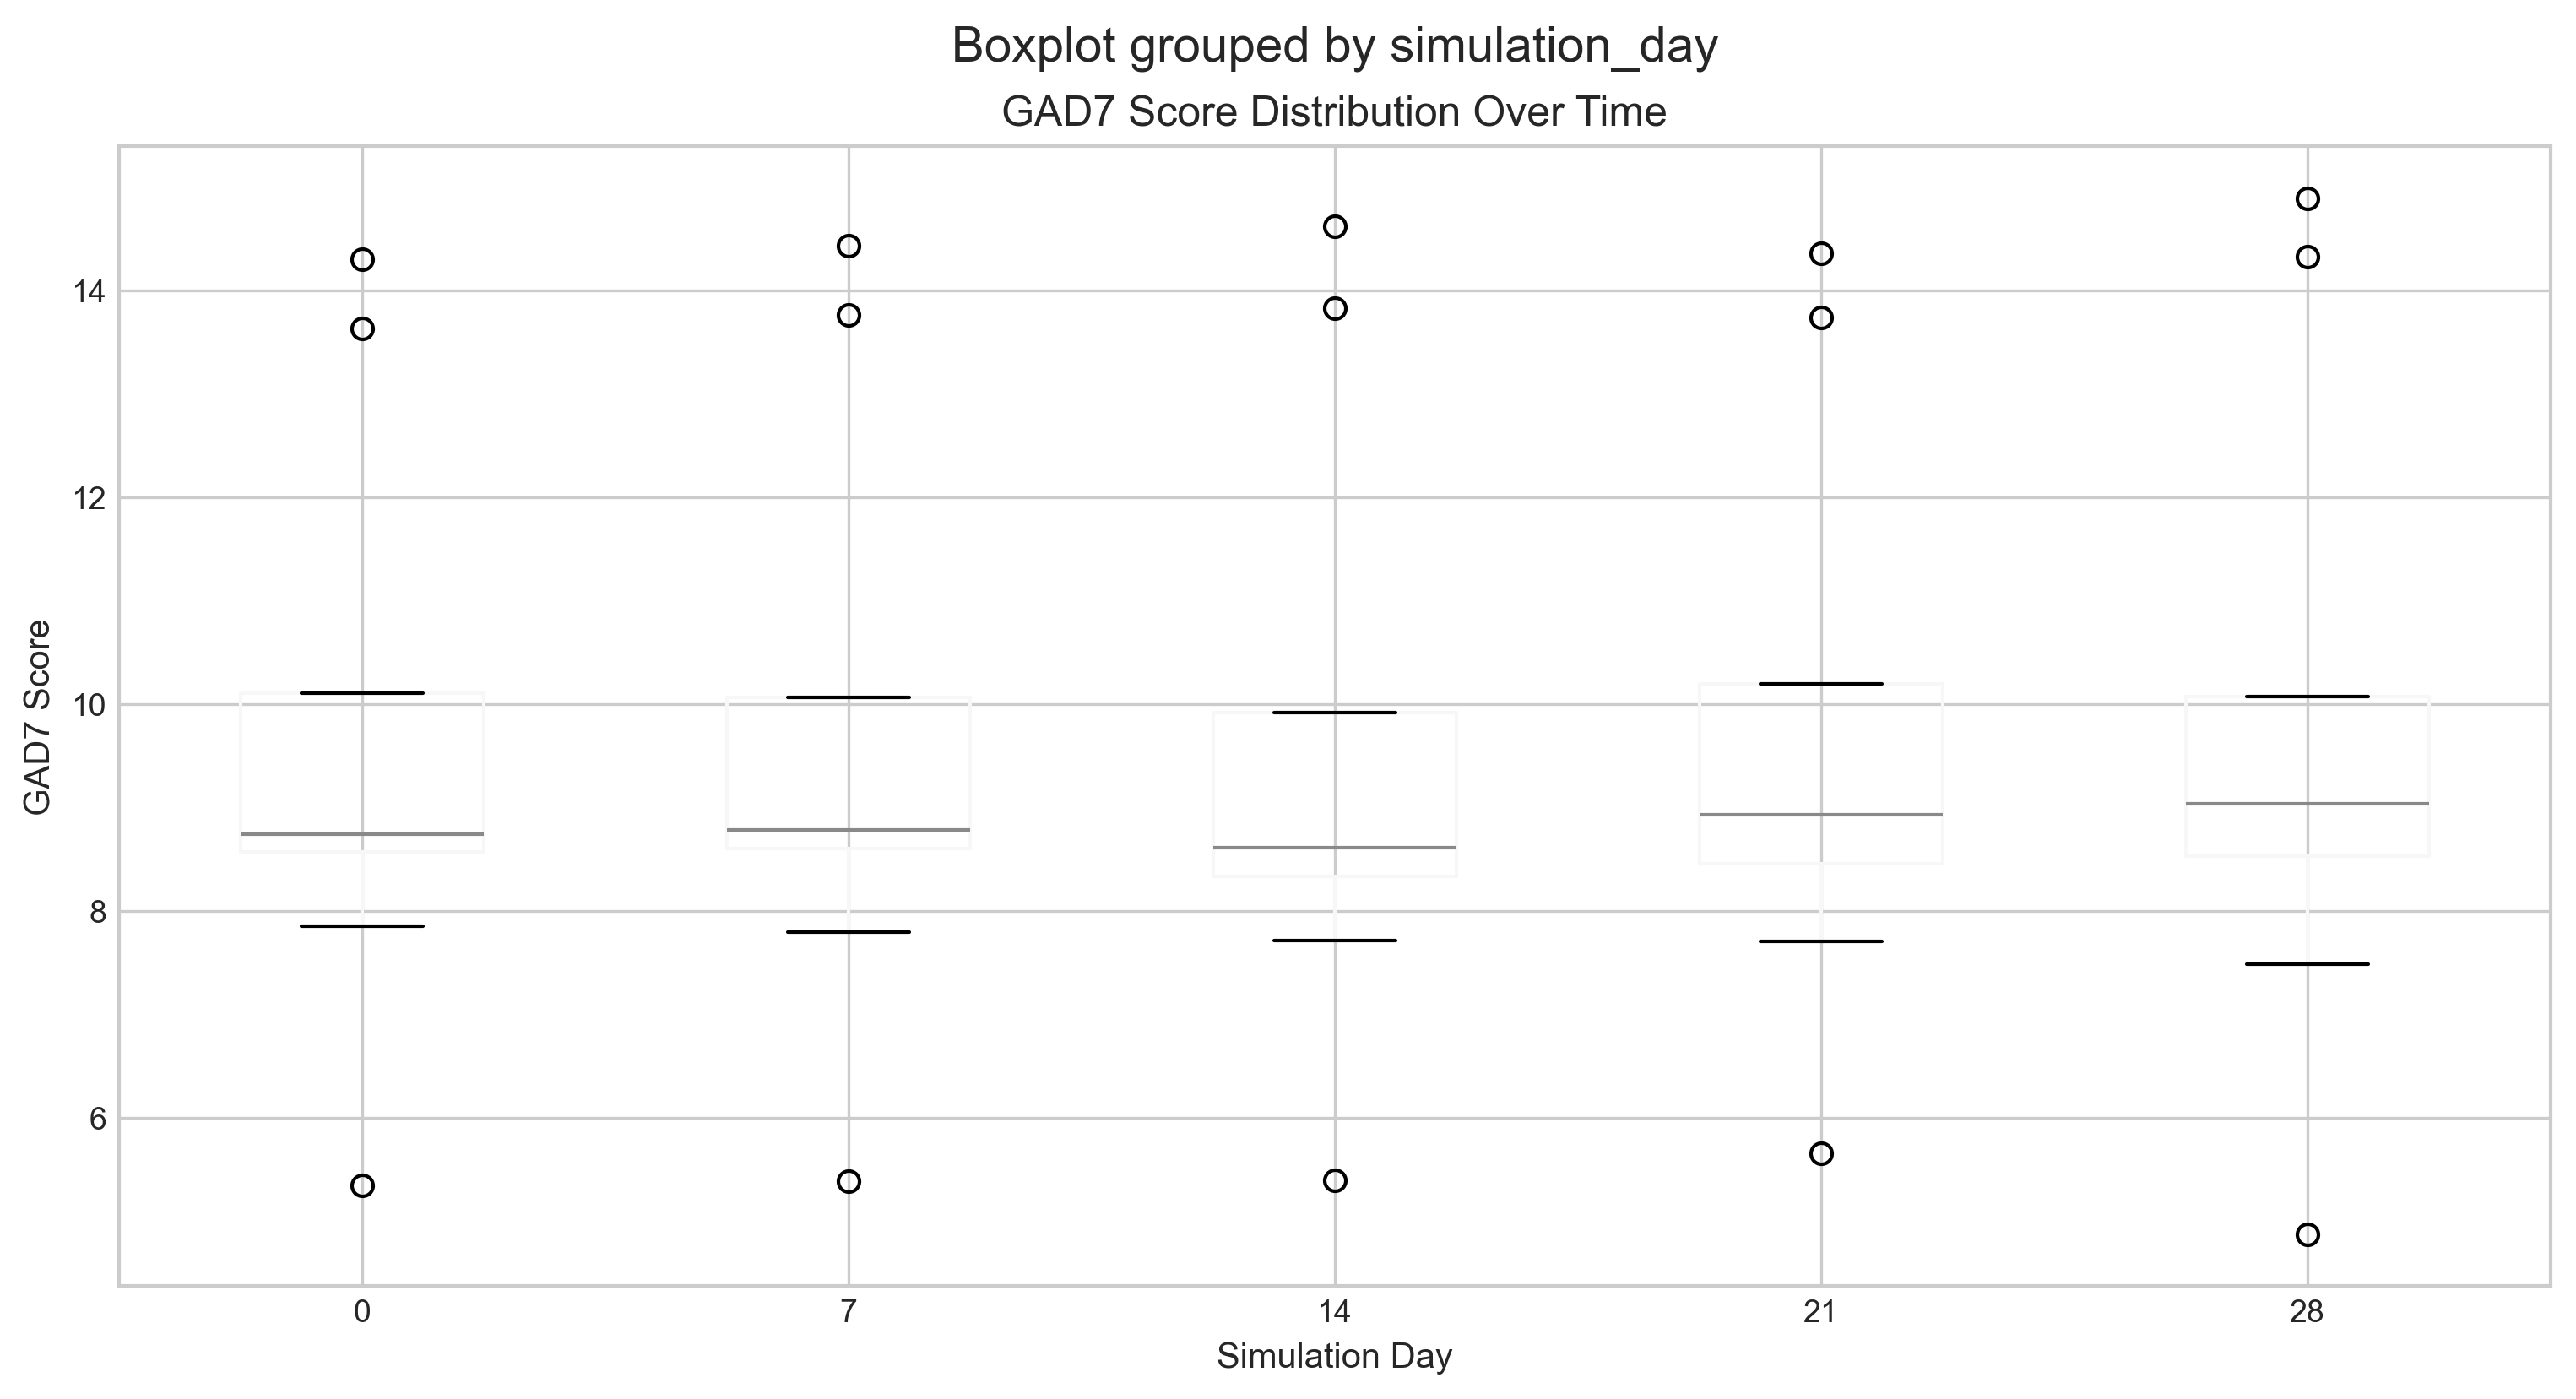

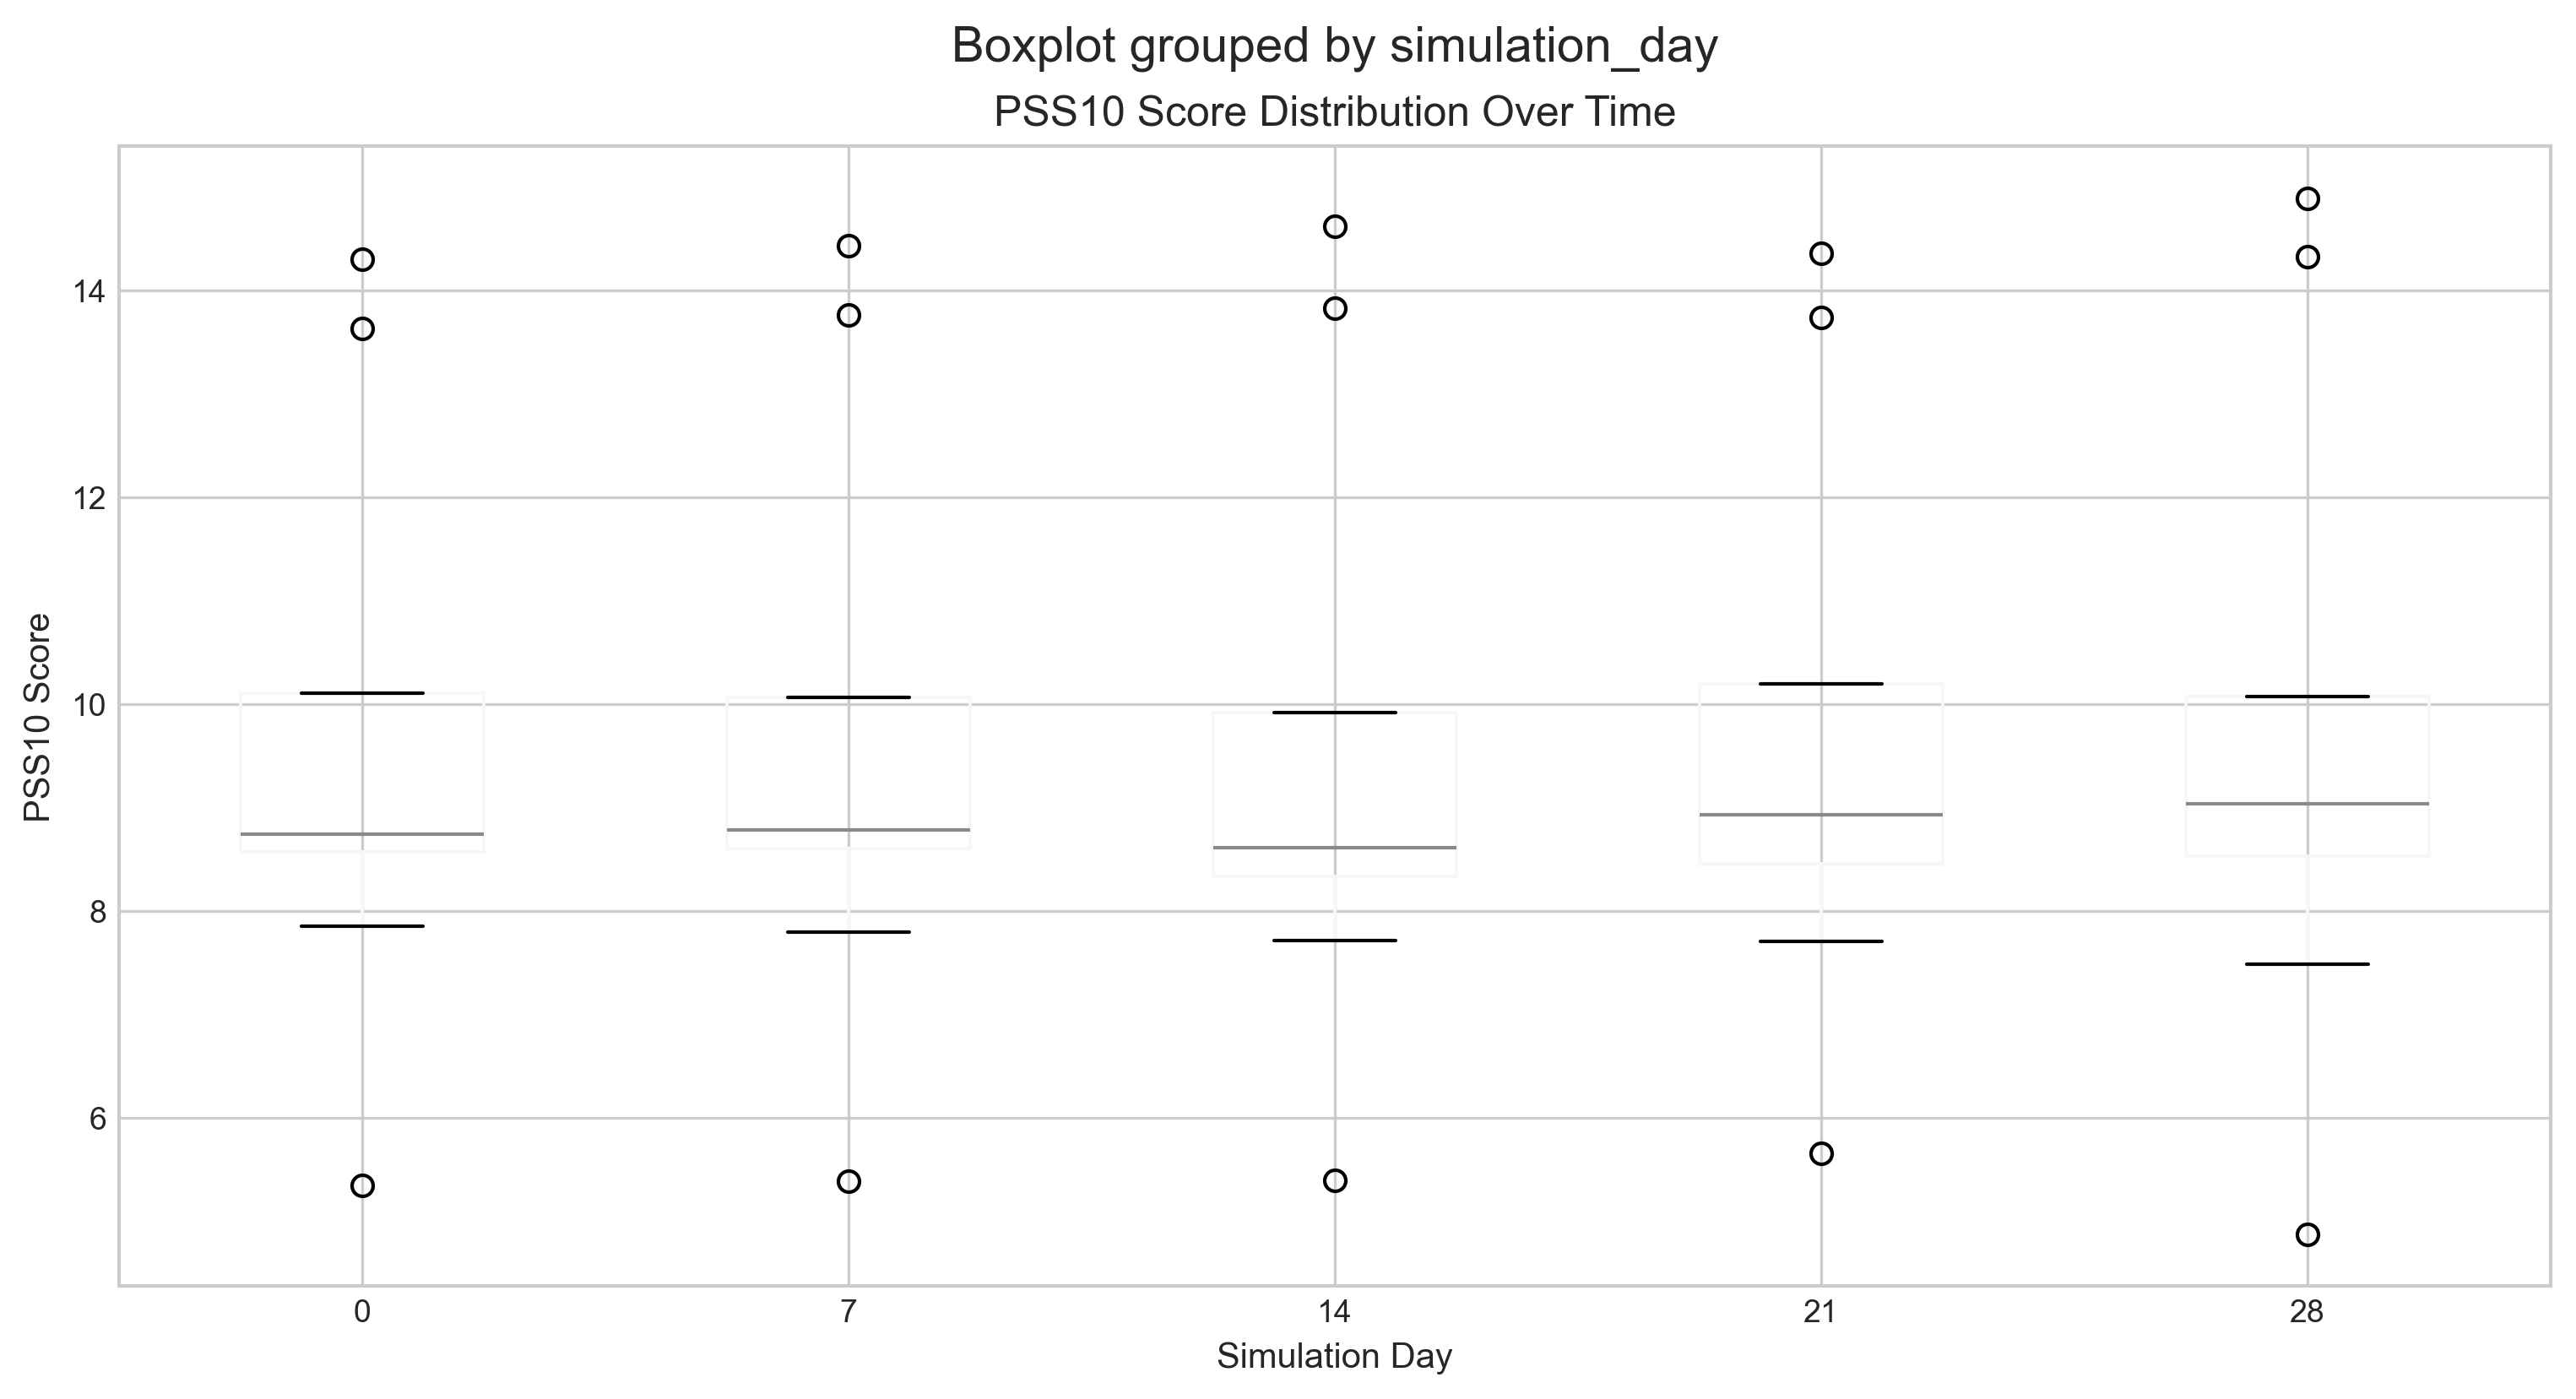

In [7]:
# Visualize assessment trends
for assessment_type in assessment_types:
    fig = viz_toolkit.plot_assessment_trends(
        assessment_data, assessment_type, plot_type="line"
    )
    plt.savefig(output_dir / f"{assessment_type}_trends_line.png", bbox_inches='tight')
    plt.show()

# %%
# Box plots for assessment distributions
for assessment_type in assessment_types:
    fig = viz_toolkit.plot_assessment_trends(
        assessment_data, assessment_type, plot_type="box"
    )
    plt.savefig(output_dir / f"{assessment_type}_trends_box.png", bbox_inches='tight')
    plt.show()

## Growth Rate Analysis

In [8]:
# Calculate growth rates for each assessment type
for assessment_type in assessment_types:
    print(f"\n=== {assessment_type.upper()} Growth Rate Analysis ===")
    
    growth_rates = longitudinal_analyzer.calculate_growth_rates(
        assessment_data, assessment_type
    )
    
    for persona_id, growth in growth_rates.items():
        print(f"\nPersona: {persona_id}")
        print(f"  Linear Growth Rate: {growth['linear_growth_rate']:.4f}")
        print(f"  Average Daily Change: {growth['avg_daily_change']:.4f}")
        print(f"  Acceleration: {growth['acceleration']:.4f}")
        print(f"  R-squared: {growth['r_squared']:.3f}")
        print(f"  Significant: {growth['significant']}")
        print(f"  Assessment Count: {growth['assessment_count']}")
        print(f"  Time Span: {growth['time_span']} days")


=== PHQ9 Growth Rate Analysis ===

Persona: persona_1
  Linear Growth Rate: 0.0077
  Average Daily Change: 0.0953
  Acceleration: 0.1759
  R-squared: 0.149
  Significant: False
  Assessment Count: 5
  Time Span: 28 days

Persona: persona_2
  Linear Growth Rate: 0.0170
  Average Daily Change: 0.1086
  Acceleration: 0.0120
  R-squared: 0.652
  Significant: False
  Assessment Count: 5
  Time Span: 28 days

Persona: persona_3
  Linear Growth Rate: 0.0159
  Average Daily Change: 0.1486
  Acceleration: 0.1326
  R-squared: 0.539
  Significant: False
  Assessment Count: 5
  Time Span: 28 days

=== GAD7 Growth Rate Analysis ===

Persona: persona_1
  Linear Growth Rate: -0.0070
  Average Daily Change: -0.0340
  Acceleration: 0.0221
  R-squared: 0.289
  Significant: False
  Assessment Count: 5
  Time Span: 28 days

Persona: persona_2
  Linear Growth Rate: 0.0196
  Average Daily Change: 0.1745
  Acceleration: 0.1553
  R-squared: 0.628
  Significant: False
  Assessment Count: 5
  Time Span: 28 day

## Change Point Detection

In [9]:
# Detect change points in assessment trajectories
for assessment_type in assessment_types:
    print(f"\n=== {assessment_type.upper()} Change Point Detection ===")
    
    type_data = assessment_data[assessment_data['assessment_type'] == assessment_type]
    
    for persona_id in type_data['persona_id'].unique():
        persona_data = type_data[type_data['persona_id'] == persona_id].sort_values('simulation_day')
        
        if len(persona_data) >= 3:
            change_points = stats_analyzer.detect_change_points(
                persona_data['total_score'].values, method="cusum"
            )
            
            print(f"\nPersona: {persona_id}")
            print(f"  Change Points: {change_points['change_points']}")
            print(f"  Method: {change_points['method']}")
            
            if change_points['change_points']:
                print(f"  Number of Change Points: {len(change_points['change_points'])}")
            else:
                print("  No significant change points detected")


=== PHQ9 Change Point Detection ===

Persona: persona_1
  Change Points: []
  Method: CUSUM control chart
  No significant change points detected

Persona: persona_2
  Change Points: []
  Method: CUSUM control chart
  No significant change points detected

Persona: persona_3
  Change Points: []
  Method: CUSUM control chart
  No significant change points detected

=== GAD7 Change Point Detection ===

Persona: persona_1
  Change Points: []
  Method: CUSUM control chart
  No significant change points detected

Persona: persona_2
  Change Points: []
  Method: CUSUM control chart
  No significant change points detected

Persona: persona_3
  Change Points: []
  Method: CUSUM control chart
  No significant change points detected

=== PSS10 Change Point Detection ===

Persona: persona_1
  Change Points: []
  Method: CUSUM control chart
  No significant change points detected

Persona: persona_2
  Change Points: []
  Method: CUSUM control chart
  No significant change points detected

Persona

## Trajectory Pattern Detection

In [10]:
# Detect trajectory patterns
for assessment_type in assessment_types:
    print(f"\n=== {assessment_type.upper()} Trajectory Pattern Detection ===")
    
    patterns = longitudinal_analyzer.detect_trajectory_patterns(
        assessment_data, assessment_type
    )
    
    for persona_id, persona_patterns in patterns.items():
        print(f"\nPersona: {persona_id}")
        for pattern_type, pattern_data in persona_patterns.items():
            print(f"  {pattern_type}: {pattern_data}")


=== PHQ9 Trajectory Pattern Detection ===

Persona: persona_1
  stable: {'slope': np.float64(0.007728581735644648), 'r_squared': np.float64(0.3856891630252524), 'p_value': np.float64(0.5213876096640173)}
  accelerating: {'acceleration': np.float64(0.17587062735862524)}

Persona: persona_2
  accelerating: {'acceleration': np.float64(0.01197925320597193)}

Persona: persona_3
  accelerating: {'acceleration': np.float64(0.13261453122406586)}

=== GAD7 Trajectory Pattern Detection ===

Persona: persona_1
  stable: {'slope': np.float64(-0.007004990454650923), 'r_squared': np.float64(-0.5373267857710018), 'p_value': np.float64(0.35037297646208115)}
  accelerating: {'acceleration': np.float64(0.022073833673709114)}

Persona: persona_2
  accelerating: {'acceleration': np.float64(0.15526022877408371)}

Persona: persona_3
  stable: {'slope': np.float64(0.0008663306042761729), 'r_squared': np.float64(0.09579815378061374), 'p_value': np.float64(0.8782128250126031)}
  decelerating: {'acceleration':

## Personality Trait Drift Analysis

In [15]:
# Load persona data for trait analysis
persona_data_path = Path("../../config/personas")
if persona_data_path.exists():
    import yaml
    
    personas = []
    for file in persona_data_path.glob("*.yaml"):
        with open(file, 'r') as f:
            config = yaml.safe_load(f)
        
        # Create sample state with drift
        from models import PersonaBaseline, PersonaState, Persona
        
        baseline = PersonaBaseline(**config)
        
        # Generate valid clinical scores within the model constraints
        # PHQ-9: 0-27, GAD-7: 0-21, PSS-10: 0-40
        current_phq9 = max(0.0, min(27.0, baseline.baseline_phq9 + np.random.normal(0, 2)))
        current_gad7 = max(0.0, min(21.0, baseline.baseline_gad7 + np.random.normal(0, 2)))
        current_pss10 = max(0.0, min(40.0, baseline.baseline_pss10 + np.random.normal(0, 2)))
        
        state = PersonaState(
            persona_id=baseline.name.lower().replace(" ", "_"),
            simulation_day=30,
            last_assessment_day=28,
            current_phq9=current_phq9,
            current_gad7=current_gad7,
            current_pss10=current_pss10,
            drift_magnitude=np.random.uniform(0.1, 0.3),
            emotional_state="neutral",
            stress_level=np.random.uniform(0.0, 5.0)  # Stress level 0-10, but keep reasonable
        )
        
        # Add some trait changes (keep small to avoid exceeding 0-1 bounds)
        trait_changes = {
            'openness': np.random.normal(0, 0.02),
            'conscientiousness': np.random.normal(0, 0.02),
            'extraversion': np.random.normal(0, 0.02),
            'agreeableness': np.random.normal(0, 0.02),
            'neuroticism': np.random.normal(0, 0.02)
        }
        state.trait_changes = trait_changes
        
        persona = Persona(baseline=baseline, state=state)
        # exclude test persona - its for dev
        if persona.baseline.name != "Test Persona":
            personas.append(persona)
    
    print(f"Loaded {len(personas)} personas with drift data")
else:
    print("Persona config not found, skipping trait drift analysis")

Loaded 3 personas with drift data


In [16]:
# Analyze personality trait trajectories
if 'personas' in locals() and personas:
    trait_trajectories = longitudinal_analyzer.analyze_personality_trajectories(personas)
    
    print("=== Personality Trait Trajectory Analysis ===")
    
    for trait, trajectories in trait_trajectories.items():
        print(f"\n{trait.title()} Trajectories:")
        for trajectory in trajectories:
            print(f"  {trajectory['persona_id']}:")
            print(f"    Baseline: {trajectory['baseline_value']:.3f}")
            print(f"    Current: {trajectory['current_value']:.3f}")
            print(f"    Change: {trajectory['change_magnitude']:.3f}")
            print(f"    Change %: {trajectory['change_percentage']:.1f}%")

=== Personality Trait Trajectory Analysis ===

Openness Trajectories:
  alfred:
    Baseline: 0.300
    Current: 0.288
    Change: -0.012
    Change %: -3.9%
  kara:
    Baseline: 0.800
    Current: 0.810
    Change: 0.010
    Change %: 1.3%
  marcus:
    Baseline: 0.700
    Current: 0.713
    Change: 0.013
    Change %: 1.9%

Conscientiousness Trajectories:
  alfred:
    Baseline: 0.900
    Current: 0.917
    Change: 0.017
    Change %: 1.9%
  kara:
    Baseline: 0.600
    Current: 0.584
    Change: -0.016
    Change %: -2.7%
  marcus:
    Baseline: 0.800
    Current: 0.851
    Change: 0.051
    Change %: 6.4%

Extraversion Trajectories:
  alfred:
    Baseline: 0.200
    Current: 0.154
    Change: -0.046
    Change %: -23.2%
  kara:
    Baseline: 0.900
    Current: 0.897
    Change: -0.003
    Change %: -0.4%
  marcus:
    Baseline: 0.400
    Current: 0.378
    Change: -0.022
    Change %: -5.5%

Agreeableness Trajectories:
  alfred:
    Baseline: 0.500
    Current: 0.495
    Change: 